## Redes Neuronales - Trabajo Practico N°1 - Regresión Logística
### Physicochemical Properties of Protein Tertiary Structure Data Set 
es un dataset para construir un predictor del tamaño de residuos de proteínas en términos de características físico-químicas de las mismas (problema de regresión).

In [81]:
import pandas as pd
import src.functions as nn
from keras.models import Sequential #Para poder definir un modelo secuencial
from keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("data/CASP.csv", sep=',')

In [15]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


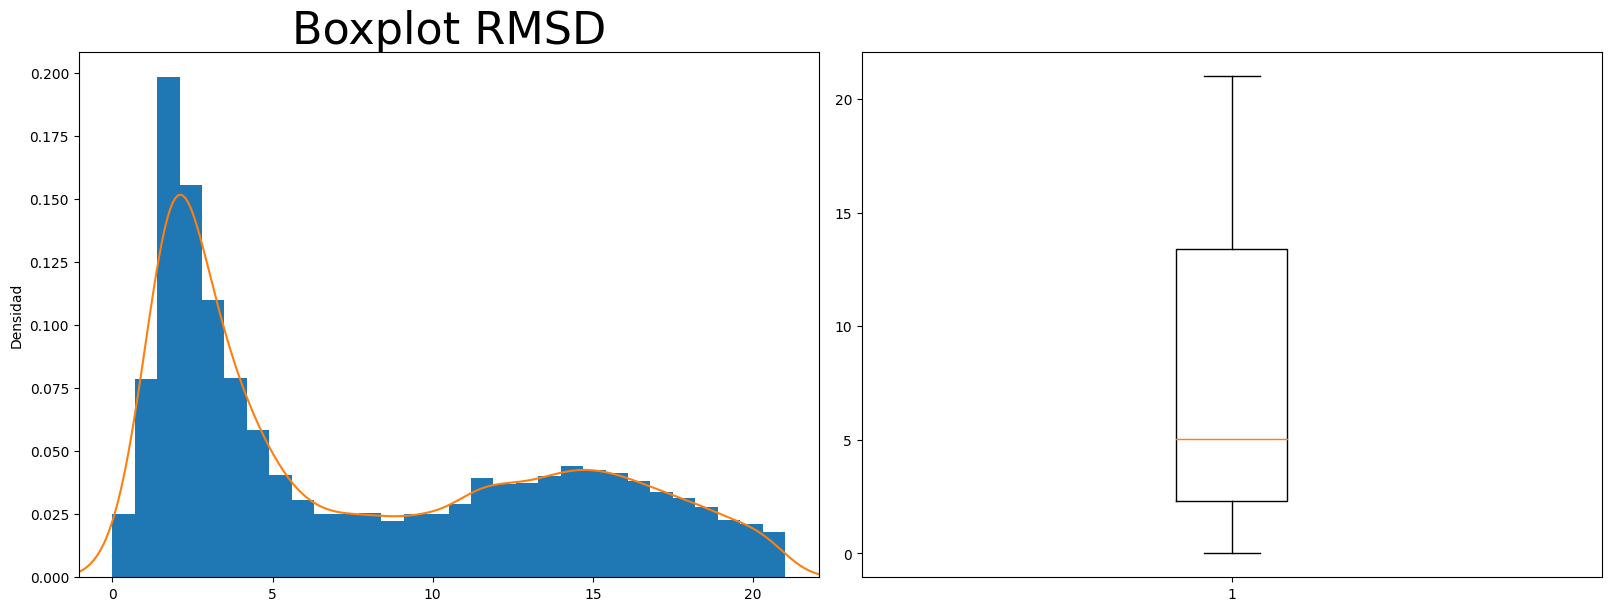

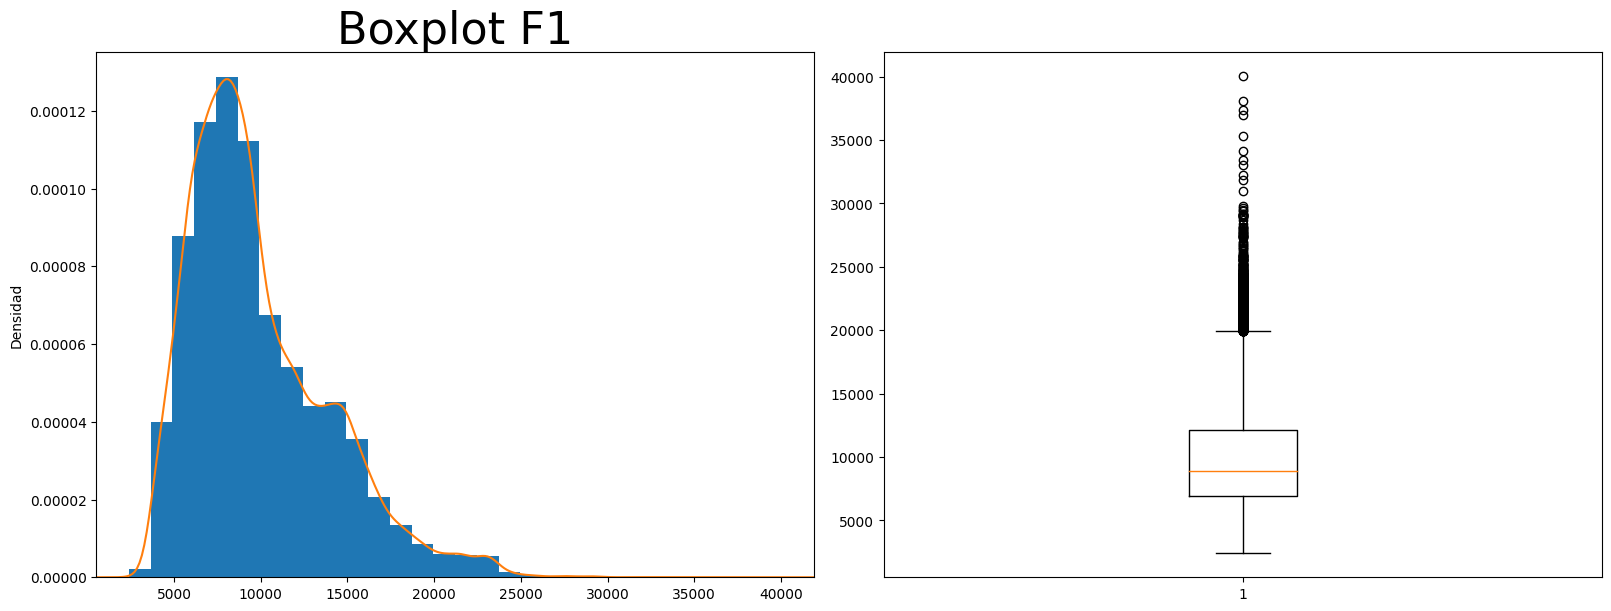

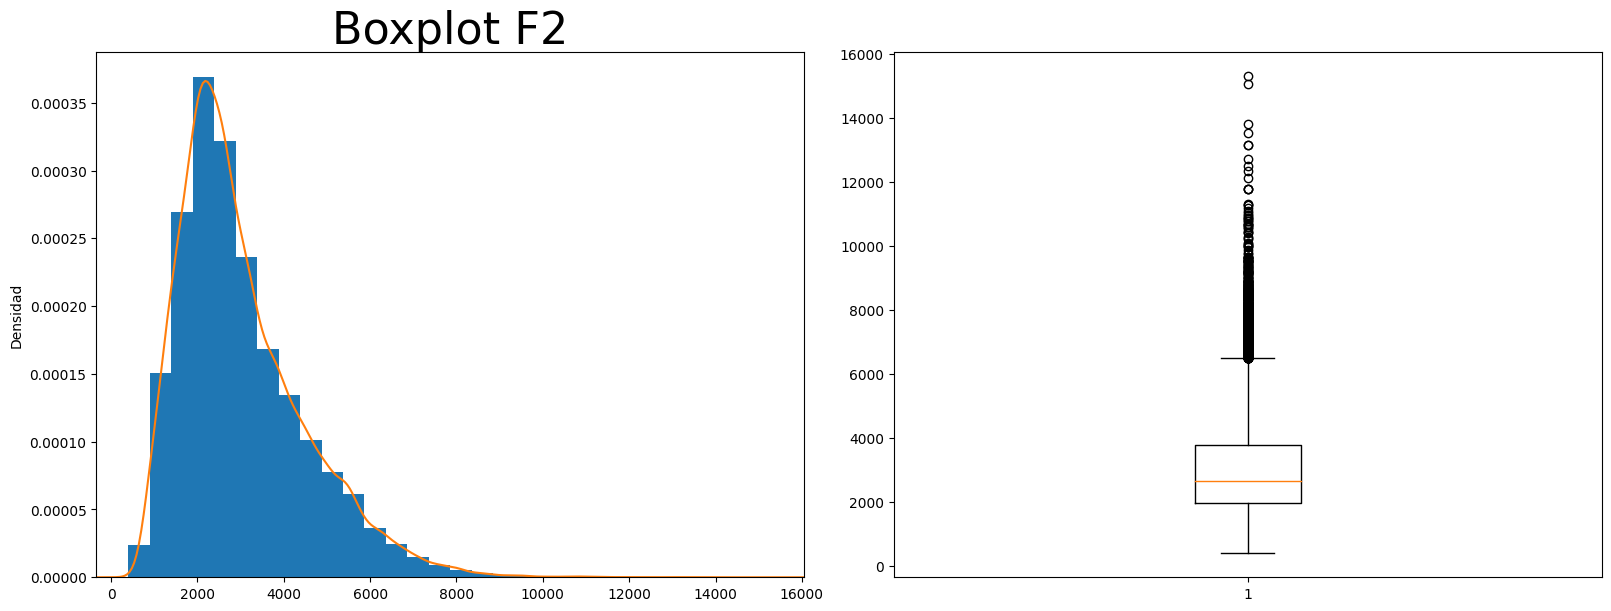

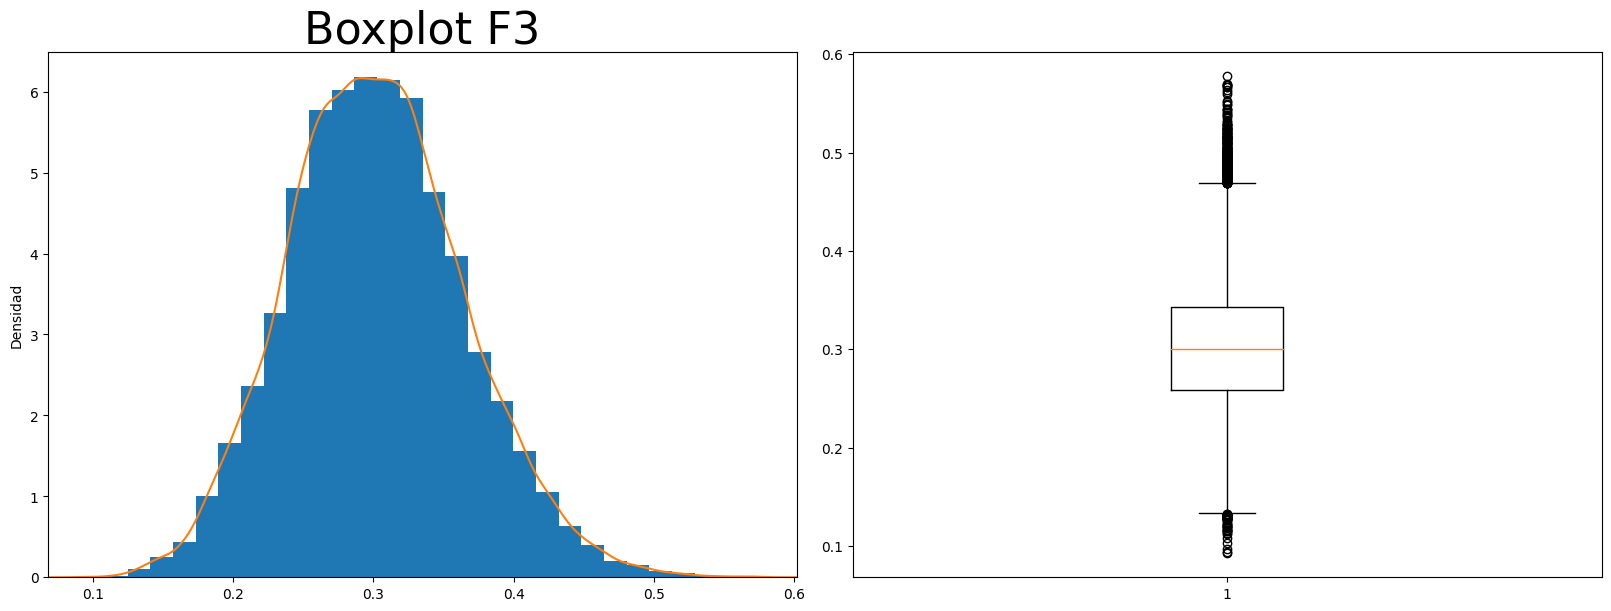

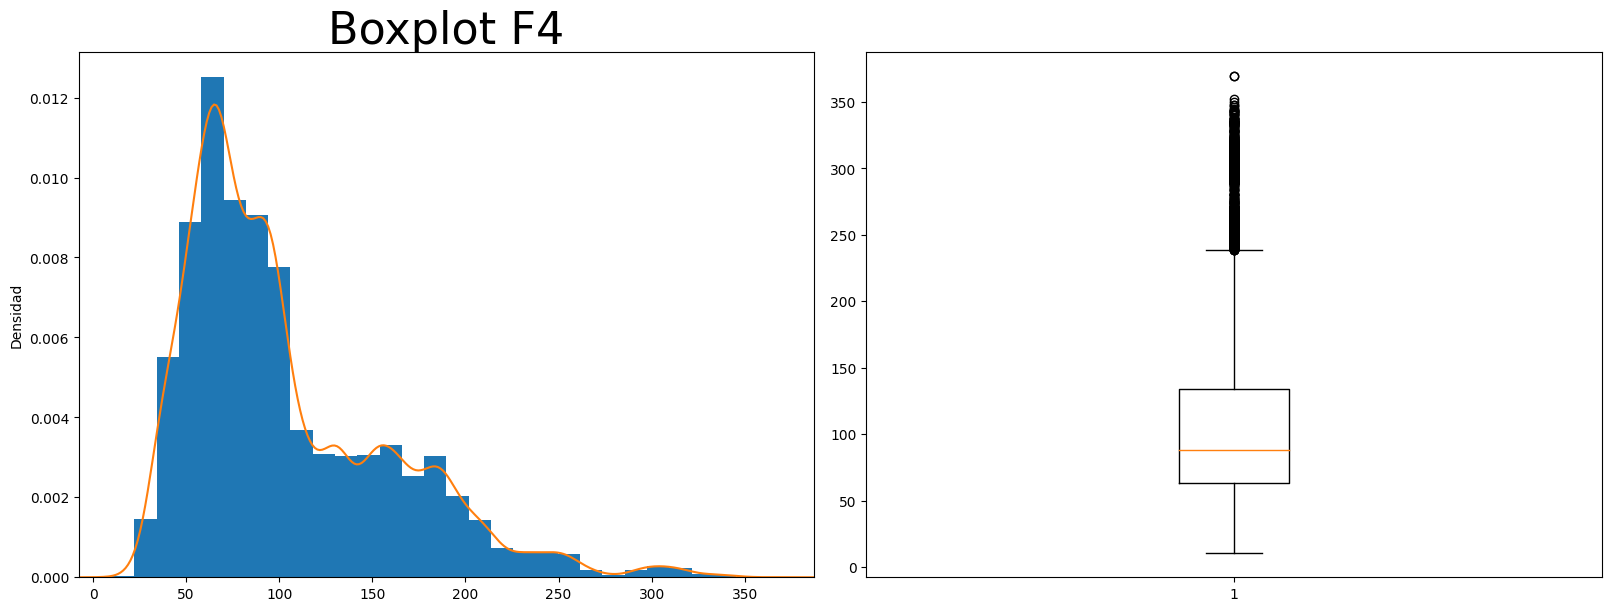

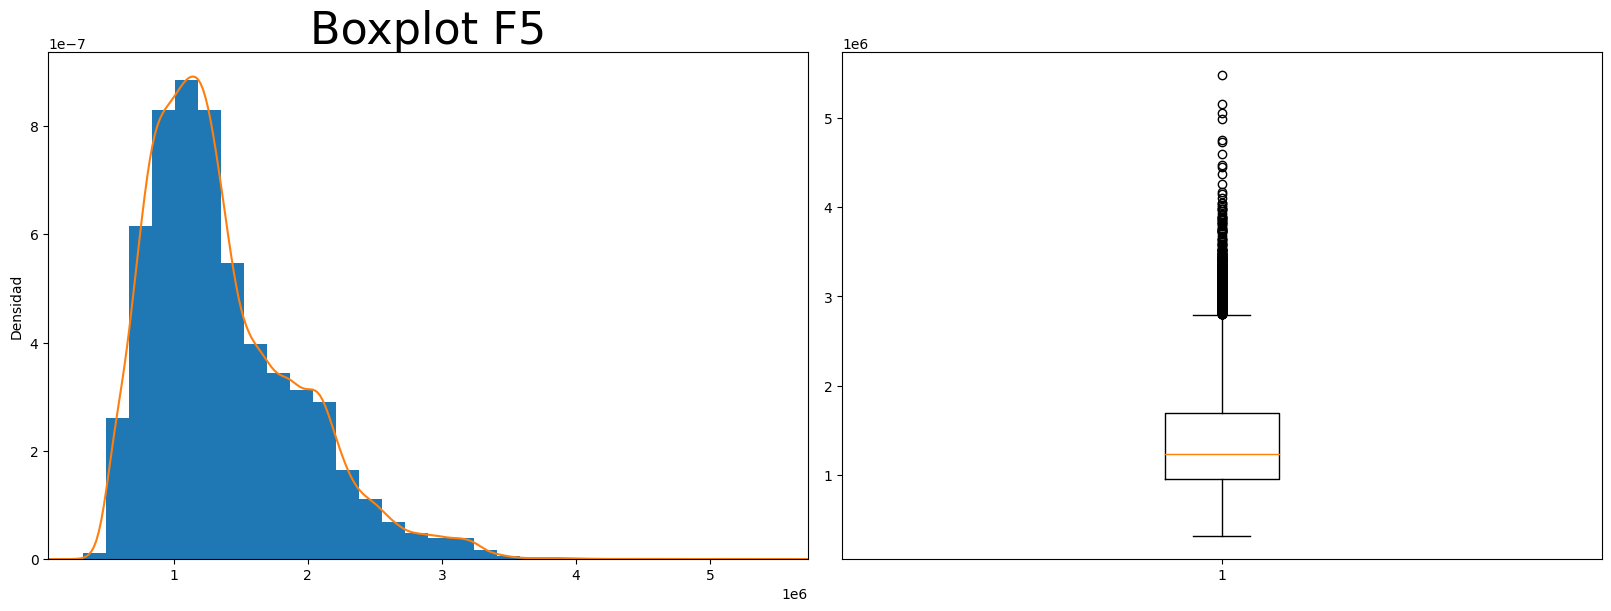

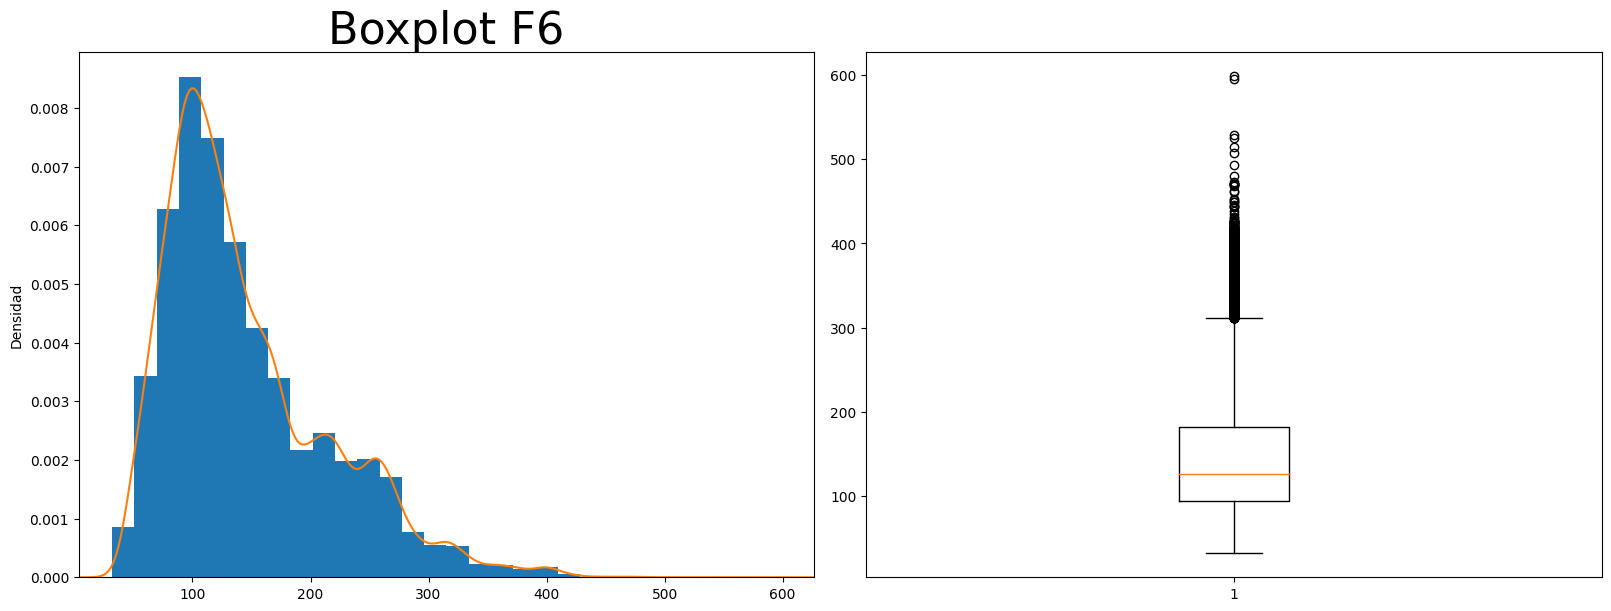

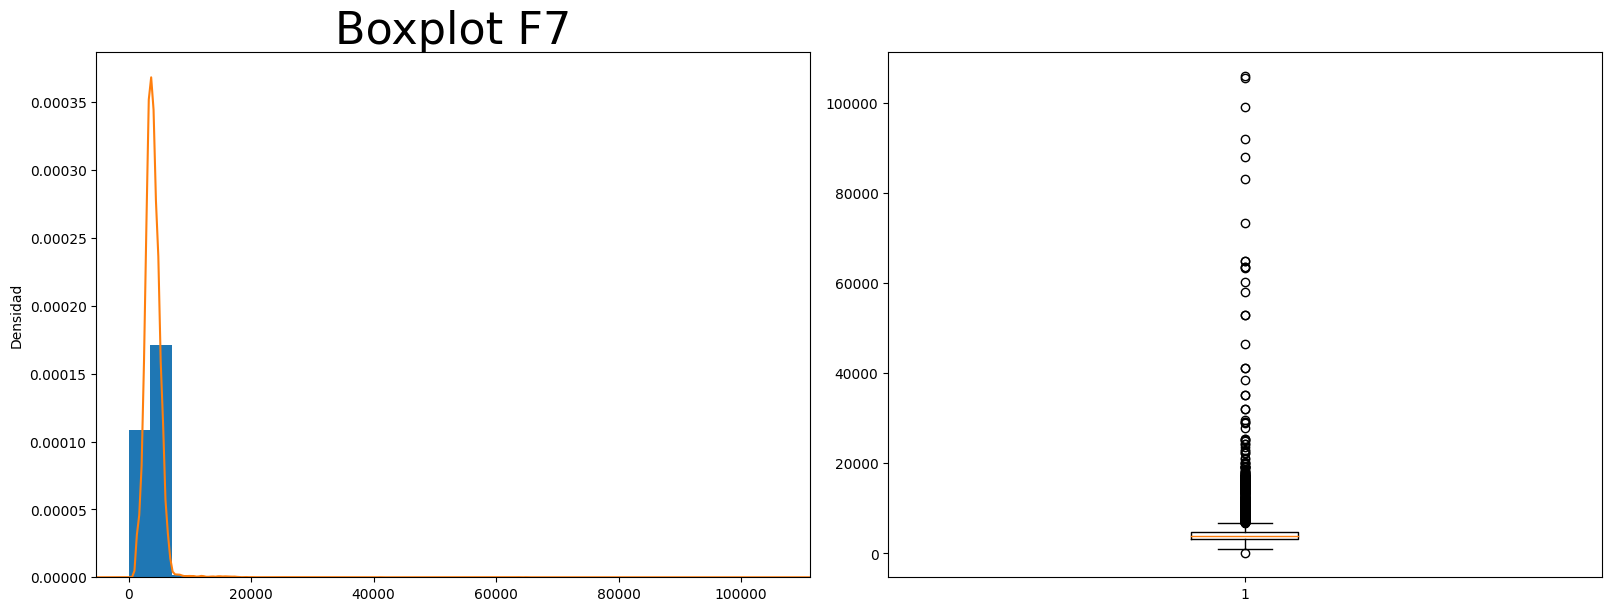

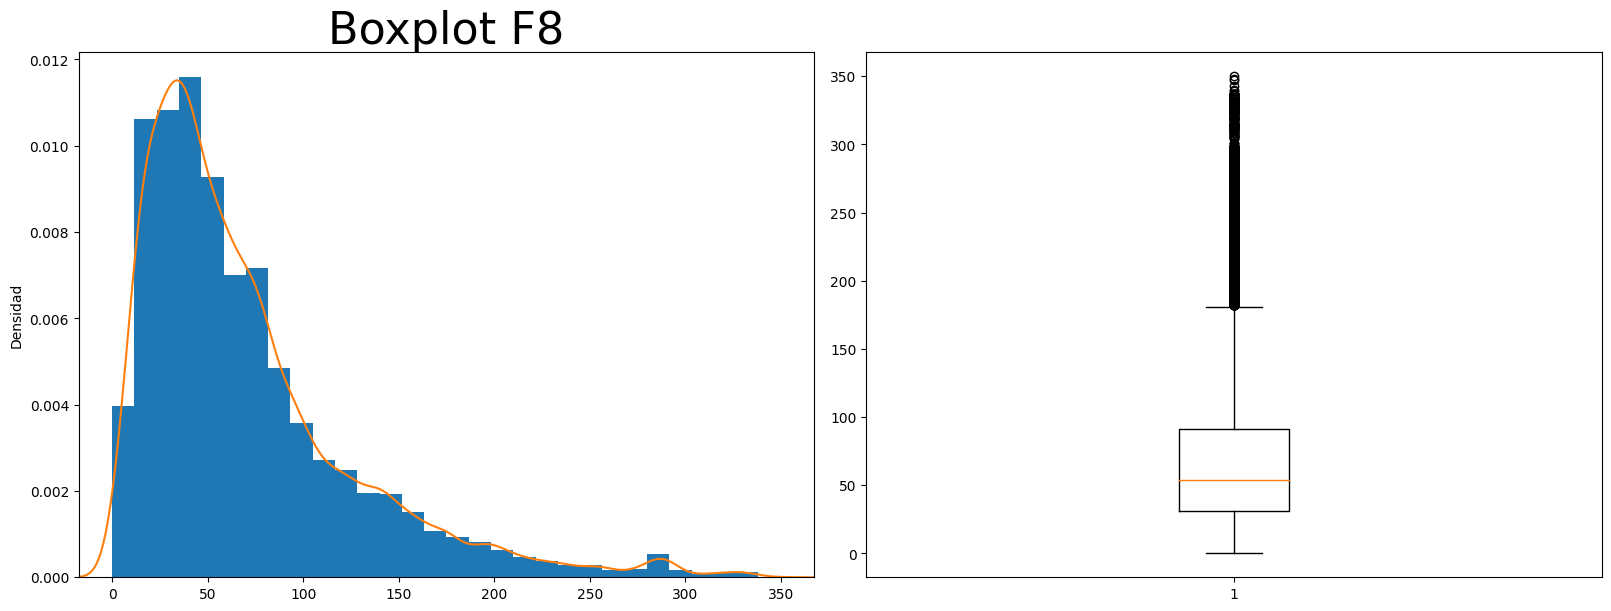

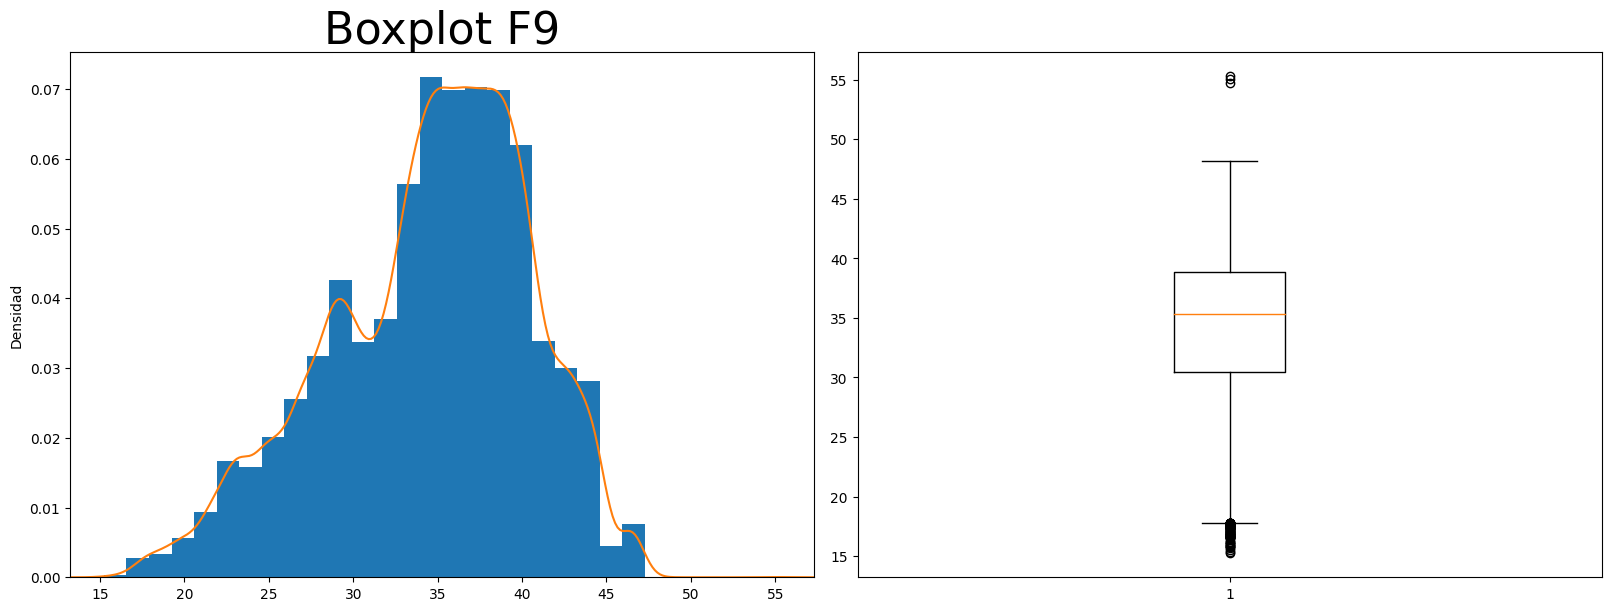

In [13]:
for c in df.keys():
    nn.pretty_param(df,c,30)

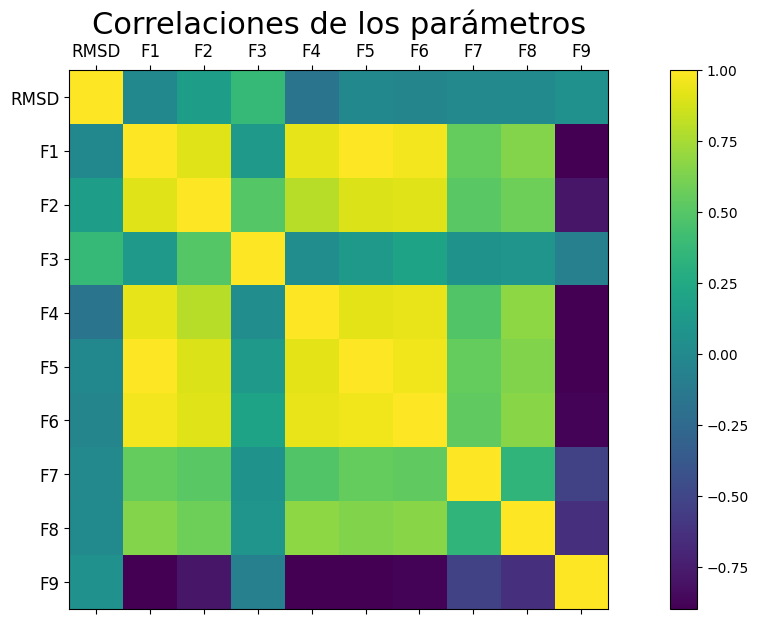

In [6]:
nn.pretty_corr_matrix(df,title="Correlaciones de los parámetros",figsize=(16,7))

In [78]:
model = Sequential()
good_df = df.drop(columns=["F3","F7","F8"])
temp_data = (good_df-good_df.mean())/good_df.std()
model.add(Dense(1, input_shape =(len(temp_data.drop(columns="RMSD").keys()),), activation="linear"))
model.compile( optimizer = Adam(learning_rate=1e-1), loss = "mse")

In [79]:
train_df, test_df = train_test_split(temp_data[:5000], test_size=0.3, random_state=42,shuffle=True)
x_test = test_df.drop(columns="RMSD").values
y_test = test_df["RMSD"].values
x_train = train_df.drop(columns="RMSD").values
y_train = train_df["RMSD"].values
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_test,y_test),
    epochs=20, batch_size=15)

Epoch 1/20
234/234 [==============================] - 1s 4ms/step - loss: 0.8420 - val_loss: 0.7853
Epoch 2/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8290 - val_loss: 0.8067
Epoch 3/20
234/234 [==============================] - 1s 4ms/step - loss: 0.8197 - val_loss: 0.7911
Epoch 4/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8187 - val_loss: 0.8185
Epoch 5/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8024 - val_loss: 0.7875
Epoch 6/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8730 - val_loss: 0.8252
Epoch 7/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8498 - val_loss: 0.7929
Epoch 8/20
234/234 [==============================] - 1s 4ms/step - loss: 0.8040 - val_loss: 0.8893
Epoch 9/20
234/234 [==============================] - 1s 5ms/step - loss: 0.8454 - val_loss: 0.8363
Epoch 10/20
234/234 [==============================] - 1s 3ms/step - loss: 0.8141 - val_loss: 0.7915

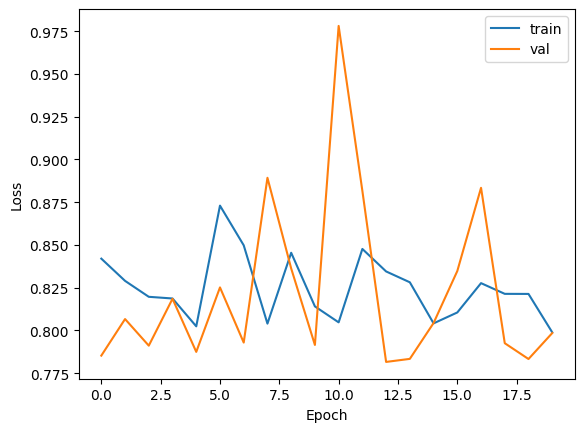

In [80]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
poly = PolynomialFeatures(2,include_bias=False)
X_2=poly.fit_transform(X,)